In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(42)

2025-08-14 09:47:34.287466: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-14 09:47:34.316129: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-14 09:47:34.737631: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
(x_train_fmnist, y_train_fmnist), (x_test_fmnist, y_test_fmnist) = fashion_mnist.load_data()

num_classes_fmnist = len(np.unique(y_train_fmnist))
print(f"Classes: {num_classes_fmnist}, Image shape: {x_train_fmnist[0].shape}")

x_train_fmnist = x_train_fmnist / 255.0
x_test_fmnist = x_test_fmnist / 255.0

x_train_fmnist_cnn = x_train_fmnist.reshape(-1, 28, 28, 1)
x_test_fmnist_cnn = x_test_fmnist.reshape(-1, 28, 28, 1)

y_train_fmnist_cat = to_categorical(y_train_fmnist)
y_test_fmnist_cat = to_categorical(y_test_fmnist)

Classes: 10, Image shape: (28, 28)


In [3]:
fcnn_fmnist = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(num_classes_fmnist, activation='softmax')
])

fcnn_fmnist.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_fcnn_fmnist = fcnn_fmnist.fit(x_train_fmnist, y_train_fmnist_cat,
                                      epochs=50,
                                      batch_size=64,
                                      validation_split=0.2,
                                      callbacks=[early_stop])


2025-08-14 09:47:35.691978: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-08-14 09:47:35.692004: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: computinglab26-03
2025-08-14 09:47:35.692008: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: computinglab26-03
2025-08-14 09:47:35.692074: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 520.61.5
2025-08-14 09:47:35.692086: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 520.61.5
2025-08-14 09:47:35.692088: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 520.61.5


Epoch 1/50
750/750 [==============================] - 5s 5ms/step - loss: 0.7684 - accuracy: 0.7170 - val_loss: 0.4788 - val_accuracy: 0.8317
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.5361 - accuracy: 0.8081 - val_loss: 0.4384 - val_accuracy: 0.8382
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 0.4835 - accuracy: 0.8274 - val_loss: 0.3996 - val_accuracy: 0.8506
Epoch 4/50
750/750 [==============================] - 4s 5ms/step - loss: 0.4637 - accuracy: 0.8343 - val_loss: 0.3952 - val_accuracy: 0.8572
Epoch 5/50
750/750 [==============================] - 5s 6ms/step - loss: 0.4392 - accuracy: 0.8435 - val_loss: 0.3839 - val_accuracy: 0.8604
Epoch 6/50
750/750 [==============================] - 4s 6ms/step - loss: 0.4267 - accuracy: 0.8458 - val_loss: 0.3674 - val_accuracy: 0.8667
Epoch 7/50
750/750 [==============================] - 4s 6ms/step - loss: 0.4133 - accuracy: 0.8512 - val_loss: 0.3589 - val_accuracy: 0.8707
Epoch 

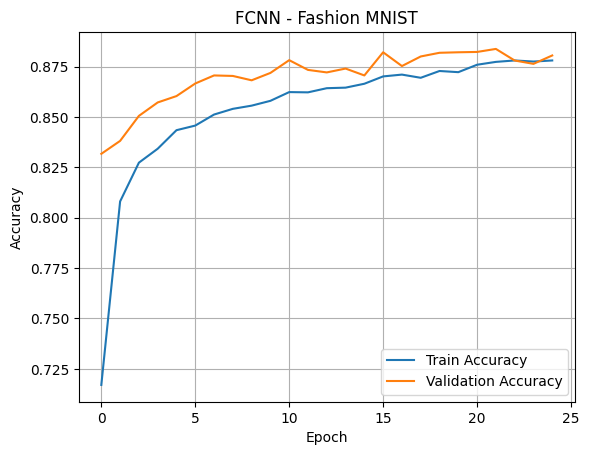

In [7]:
plt.plot(history_fcnn_fmnist.history['accuracy'], label='Train Accuracy')
plt.plot(history_fcnn_fmnist.history['val_accuracy'], label='Validation Accuracy')
plt.title('FCNN - Fashion MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
cnn1_fmnist = Sequential([
    Conv2D(32, (5,5), strides=1, padding='valid', input_shape=(28,28,1)),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(num_classes_fmnist, activation='softmax')
])

cnn1_fmnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_cnn1_fmnist = cnn1_fmnist.fit(x_train_fmnist_cnn, y_train_fmnist_cat,
                                      epochs=50,
                                      batch_size=64,
                                      validation_split=0.2,
                                      callbacks=[early_stop])


Epoch 1/50
750/750 [==============================] - 7s 8ms/step - loss: 0.6809 - accuracy: 0.7529 - val_loss: 0.4021 - val_accuracy: 0.8574
Epoch 2/50
750/750 [==============================] - 6s 8ms/step - loss: 0.4852 - accuracy: 0.8217 - val_loss: 0.3457 - val_accuracy: 0.8753
Epoch 3/50
750/750 [==============================] - 6s 8ms/step - loss: 0.4367 - accuracy: 0.8404 - val_loss: 0.3180 - val_accuracy: 0.8843
Epoch 4/50
750/750 [==============================] - 6s 9ms/step - loss: 0.4077 - accuracy: 0.8518 - val_loss: 0.3243 - val_accuracy: 0.8778
Epoch 5/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3798 - accuracy: 0.8613 - val_loss: 0.3232 - val_accuracy: 0.8767
Epoch 6/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3640 - accuracy: 0.8672 - val_loss: 0.2986 - val_accuracy: 0.8872
Epoch 7/50
750/750 [==============================] - 6s 9ms/step - loss: 0.3514 - accuracy: 0.8706 - val_loss: 0.2784 - val_accuracy: 0.8993
Epoch 

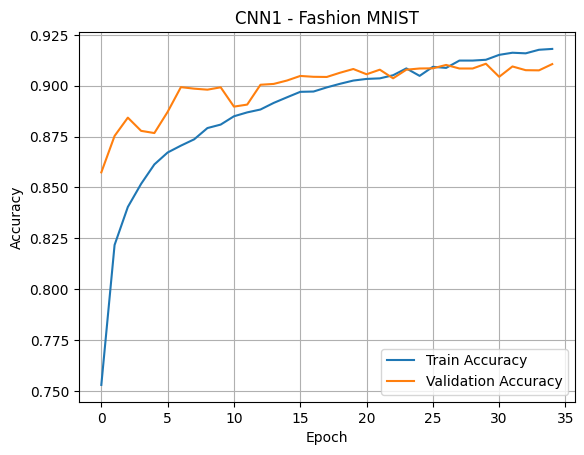

In [8]:
plt.plot(history_cnn1_fmnist.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn1_fmnist.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN1 - Fashion MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
cnn2_fmnist = Sequential([
    Conv2D(32, (3,3), padding='valid', input_shape=(28,28,1)),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Conv2D(32, (3,3), padding='valid'),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(num_classes_fmnist, activation='softmax')
])

cnn2_fmnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_cnn2_fmnist = cnn2_fmnist.fit(x_train_fmnist_cnn, y_train_fmnist_cat,
                                      epochs=50,
                                      batch_size=64,
                                      validation_split=0.2,
                                      callbacks=[early_stop])


Epoch 1/50
750/750 [==============================] - 9s 11ms/step - loss: 0.6986 - accuracy: 0.7516 - val_loss: 0.3933 - val_accuracy: 0.8582
Epoch 2/50
750/750 [==============================] - 9s 12ms/step - loss: 0.4895 - accuracy: 0.8215 - val_loss: 0.3353 - val_accuracy: 0.8760
Epoch 3/50
750/750 [==============================] - 8s 11ms/step - loss: 0.4297 - accuracy: 0.8424 - val_loss: 0.2961 - val_accuracy: 0.8880
Epoch 4/50
750/750 [==============================] - 8s 11ms/step - loss: 0.3931 - accuracy: 0.8550 - val_loss: 0.2925 - val_accuracy: 0.8949
Epoch 5/50
750/750 [==============================] - 8s 11ms/step - loss: 0.3684 - accuracy: 0.8643 - val_loss: 0.2740 - val_accuracy: 0.8971
Epoch 6/50
750/750 [==============================] - 8s 11ms/step - loss: 0.3462 - accuracy: 0.8713 - val_loss: 0.2556 - val_accuracy: 0.9056
Epoch 7/50
750/750 [==============================] - 8s 11ms/step - loss: 0.3306 - accuracy: 0.8777 - val_loss: 0.2408 - val_accuracy: 0.9133

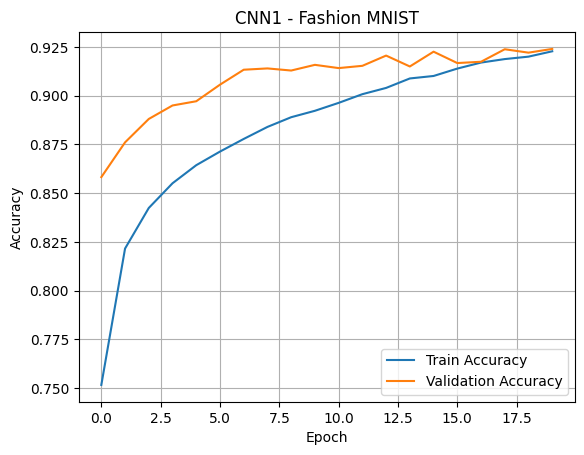

In [11]:
plt.plot(history_cnn2_fmnist.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn2_fmnist.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN1 - Fashion MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

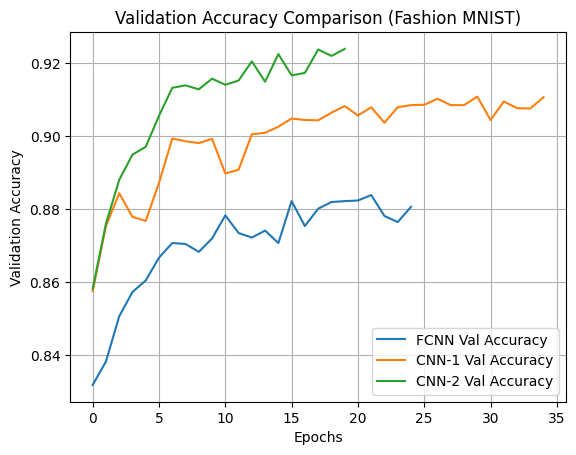

In [6]:
plt.plot(history_fcnn_fmnist.history['val_accuracy'], label='FCNN Val Accuracy')
plt.plot(history_cnn1_fmnist.history['val_accuracy'], label='CNN-1 Val Accuracy')
plt.plot(history_cnn2_fmnist.history['val_accuracy'], label='CNN-2 Val Accuracy')
plt.title('Validation Accuracy Comparison (Fashion MNIST)')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


In [10]:
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

num_classes_cifar = len(np.unique(y_train_cifar))
print(f"Classes: {num_classes_cifar}, Image shape: {x_train_cifar[0].shape}")

x_train_cifar = x_train_cifar / 255.0
x_test_cifar = x_test_cifar / 255.0

y_train_cifar_cat = to_categorical(y_train_cifar)
y_test_cifar_cat = to_categorical(y_test_cifar)

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_cifar)

Classes: 10, Image shape: (32, 32, 3)


In [12]:
fcnn_cifar = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(num_classes_cifar, activation='softmax')
])

fcnn_cifar.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_fcnn_cifar = fcnn_cifar.fit(x_train_cifar, y_train_cifar_cat,
                                    epochs=50,
                                    batch_size=64,
                                    validation_split=0.2,
                                    callbacks=[early_stop])

Epoch 1/50
625/625 [==============================] - 5s 8ms/step - loss: 2.1623 - accuracy: 0.1719 - val_loss: 2.0158 - val_accuracy: 0.2482
Epoch 2/50
625/625 [==============================] - 5s 7ms/step - loss: 2.0584 - accuracy: 0.2057 - val_loss: 1.9912 - val_accuracy: 0.2753
Epoch 3/50
625/625 [==============================] - 5s 7ms/step - loss: 2.0300 - accuracy: 0.2226 - val_loss: 2.0157 - val_accuracy: 0.2519
Epoch 4/50
625/625 [==============================] - 5s 8ms/step - loss: 2.0159 - accuracy: 0.2279 - val_loss: 1.9928 - val_accuracy: 0.2408
Epoch 5/50
625/625 [==============================] - 4s 7ms/step - loss: 2.0077 - accuracy: 0.2331 - val_loss: 1.9591 - val_accuracy: 0.2908
Epoch 6/50
625/625 [==============================] - 5s 7ms/step - loss: 1.9947 - accuracy: 0.2377 - val_loss: 1.9849 - val_accuracy: 0.2718
Epoch 7/50
625/625 [==============================] - 5s 8ms/step - loss: 1.9904 - accuracy: 0.2412 - val_loss: 1.9659 - val_accuracy: 0.2718
Epoch 

In [13]:
cnn1_cifar = Sequential([
    Conv2D(32, (5,5), strides=1, padding='valid', input_shape=(32,32,3)),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(num_classes_cifar, activation='softmax')
])

cnn1_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_cnn1_cifar = cnn1_cifar.fit(datagen.flow(x_train_cifar, y_train_cifar_cat, batch_size=64),
                                    epochs=50,
                                    validation_data=(x_test_cifar, y_test_cifar_cat),
                                    callbacks=[early_stop])

Epoch 1/50
782/782 [==============================] - 15s 19ms/step - loss: 2.1284 - accuracy: 0.1796 - val_loss: 1.8588 - val_accuracy: 0.2841
Epoch 2/50
782/782 [==============================] - 14s 18ms/step - loss: 2.0173 - accuracy: 0.1993 - val_loss: 1.8468 - val_accuracy: 0.2478
Epoch 3/50
782/782 [==============================] - 15s 19ms/step - loss: 1.9964 - accuracy: 0.2061 - val_loss: 1.8147 - val_accuracy: 0.3083
Epoch 4/50
782/782 [==============================] - 14s 18ms/step - loss: 1.9838 - accuracy: 0.2103 - val_loss: 1.9019 - val_accuracy: 0.2340
Epoch 5/50
782/782 [==============================] - 14s 19ms/step - loss: 1.9754 - accuracy: 0.2136 - val_loss: 1.7977 - val_accuracy: 0.3153
Epoch 6/50
782/782 [==============================] - 15s 19ms/step - loss: 1.9733 - accuracy: 0.2184 - val_loss: 1.9657 - val_accuracy: 0.2196
Epoch 7/50
782/782 [==============================] - 14s 18ms/step - loss: 1.9628 - accuracy: 0.2205 - val_loss: 2.2182 - val_accuracy:

In [14]:
cnn2_cifar = Sequential([
    Conv2D(32, (3,3), padding='valid', input_shape=(32,32,3)),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Conv2D(32, (3,3), padding='valid'),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(num_classes_cifar, activation='softmax')
])

cnn2_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_cnn2_cifar = cnn2_cifar.fit(datagen.flow(x_train_cifar, y_train_cifar_cat, batch_size=64),
                                    epochs=50,
                                    validation_data=(x_test_cifar, y_test_cifar_cat),
                                    callbacks=[early_stop])


Epoch 1/50
782/782 [==============================] - 18s 22ms/step - loss: 2.0931 - accuracy: 0.2018 - val_loss: 1.8462 - val_accuracy: 0.3064
Epoch 2/50
782/782 [==============================] - 17s 22ms/step - loss: 1.9009 - accuracy: 0.2516 - val_loss: 2.0588 - val_accuracy: 0.2388
Epoch 3/50
782/782 [==============================] - 17s 22ms/step - loss: 1.8502 - accuracy: 0.2745 - val_loss: 1.6590 - val_accuracy: 0.3666
Epoch 4/50
782/782 [==============================] - 17s 22ms/step - loss: 1.8087 - accuracy: 0.2903 - val_loss: 1.5248 - val_accuracy: 0.4394
Epoch 5/50
782/782 [==============================] - 17s 22ms/step - loss: 1.7703 - accuracy: 0.3120 - val_loss: 1.5519 - val_accuracy: 0.4412
Epoch 6/50
782/782 [==============================] - 17s 22ms/step - loss: 1.7492 - accuracy: 0.3179 - val_loss: 1.4873 - val_accuracy: 0.4413
Epoch 7/50
782/782 [==============================] - 17s 22ms/step - loss: 1.7263 - accuracy: 0.3265 - val_loss: 1.6211 - val_accuracy:

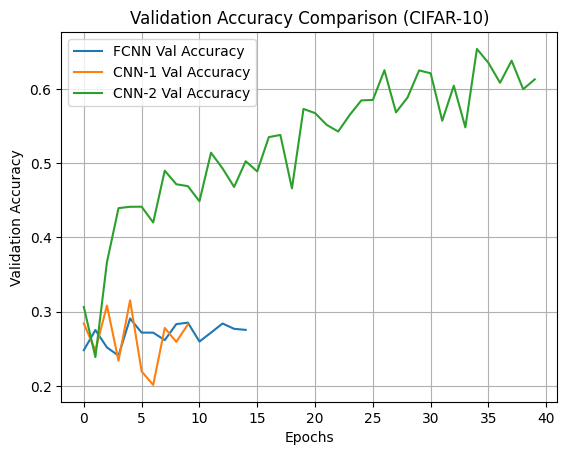

In [15]:
plt.plot(history_fcnn_cifar.history['val_accuracy'], label='FCNN Val Accuracy')
plt.plot(history_cnn1_cifar.history['val_accuracy'], label='CNN-1 Val Accuracy')
plt.plot(history_cnn2_cifar.history['val_accuracy'], label='CNN-2 Val Accuracy')
plt.title('Validation Accuracy Comparison (CIFAR-10)')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.show()